In [22]:
from pathlib import Path
from typing import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydantic import BaseModel
from pydantic_yaml import YamlModel

import networkx as nx

from annodize.field import Field, FunctionFields, NamespaceFields

In [16]:
def get_type_name(type_: type) -> str:
    """Gets a type's full name (including module)."""
    mod = getattr(type_, "__module__", "")
    return f"{mod}:{type_.__qualname__}"

def get_func_name(func: Callable) -> str:
    """Gets a function's full name."""
    mod = getattr(func, "__module__", "")
    return f"{mod}:{func.__qualname__}"


In [12]:
get_type_name(pd.DataFrame)

'pandas.core.frame:DataFrame'

In [24]:
class ConvRegistry(object):

    def __init__(self):
        self.g = nx.DiGraph()

    def register(self, func: Callable):
        """Registers a converter."""
        ff = FunctionFields.from_callable(func)
        n_func = get_func_name(func)
        # Add nodes and edges
        self.g.add_node(n_func, kind="loader", func=func)
        # Output node
        fld = ff.output_field
        n_typ = get_type_name(fld.type_)
        self.g.add_node(n_typ, type_=fld.type_)
        self.g.add_edge(n_func, n_typ, arg_name=fld.name)
        # Input nodes
        for fld in ff.input_fields:
            n_typ = get_type_name(fld.type_)
            self.g.add_node(n_typ, type_=fld.type_)
            self.g.add_edge(n_typ, n_func, arg_name=fld.name)

cr = ConvRegistry()

In [25]:
@cr.register
def path_to_df(path: Path) -> pd.DataFrame:
    # gross oversimplification :D
    return pd.read_parquet(path)

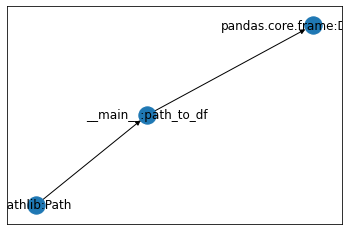

In [26]:
nx.draw_networkx(cr.g)

In [ ]:
class GlobalLS(object):
    """Global load/save interface."""

    def load(self, field: Field, value: Any) -> Any:
        """Loads the object given by a field."""
        if isinstance(value, field.type_):
            return value
        

    def save(self, field: Field, obj: Any):
        """Saves the object given by a field."""
        if field.has_args:
            pass


In [3]:
pd.DataFrame

pandas.core.frame.DataFrame